In [1]:
#importing the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading training dataset
df_train = pd.read_csv("Train.csv")

In [3]:
#top 5 rows
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
#training dataset dimension
df_train.shape

(8068, 11)

Exploratory Data Analysis

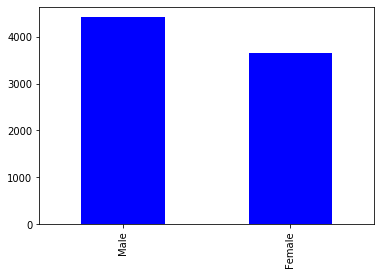

In [5]:
df_train["Gender"].value_counts().plot.bar(color="Blue")

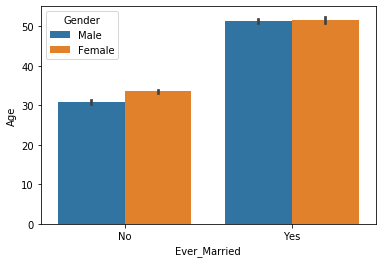

In [6]:
sns.barplot(x="Ever_Married", y="Age", hue="Gender", data=df_train)

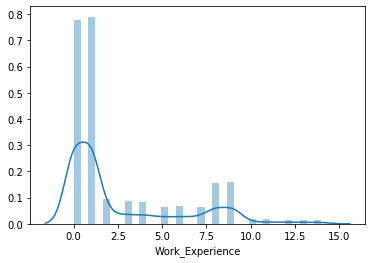

In [7]:
sns.distplot(df_train["Work_Experience"])

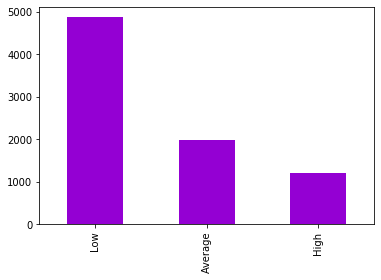

In [8]:
df_train["Spending_Score"].value_counts().plot.bar(color="#9400D3")

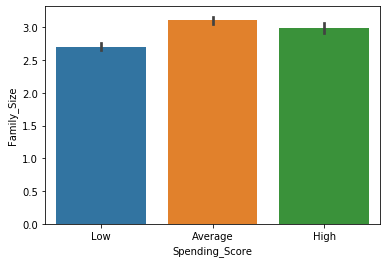

In [9]:
sns.barplot(x="Spending_Score", y="Family_Size", data=df_train)

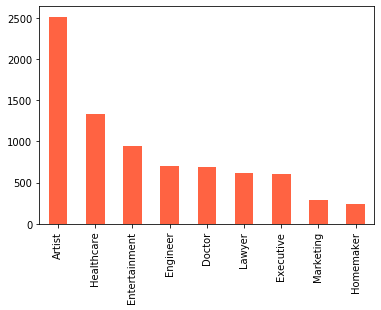

In [10]:
df_train["Profession"].value_counts().plot.bar(color="#FF6342")

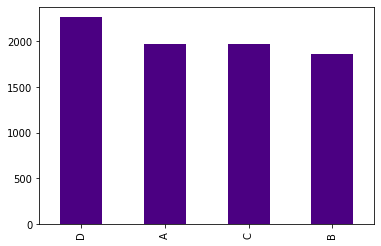

In [11]:
df_train["Segmentation"].value_counts().plot.bar(color="#4B0082")

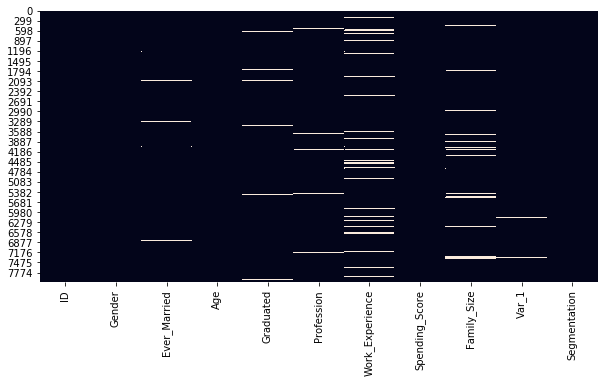

In [12]:
plt.subplots(figsize=(10,5))
sns.heatmap(df_train.isnull(),cbar=False)

In [13]:
#null values in each column
df_train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [14]:
#replacing null values and dropping unneccessary columns

In [15]:
#dropping the column "ID" since it is not neccessary for our model
df_train.drop(["ID"], axis=1, inplace=True)

In [16]:
#replacing "No" for the null values in the below two columns
df_train["Ever_Married"].fillna("No", inplace=True)
df_train["Graduated"].fillna("No", inplace=True)

In [17]:
#dropping the null values in "Profession" since it can't be replaced
df_train.dropna(subset=["Profession"], inplace=True)

In [18]:
#replacing the null values with mean for "Family size" variable
df_train["Family_Size"].fillna(df_train["Family_Size"].mean(), inplace=True)

In [19]:
#dropping the null values in "Var_1" since it can't be replaced
df_train.dropna(subset=["Var_1"], inplace=True)

In [20]:
#replacing the null values with mean for "Work Experience" variable
df_train["Work_Experience"].fillna(df_train["Work_Experience"].mean(), inplace=True)

In [21]:
df_train["Gender"].value_counts()

Male      4318
Female    3553
Name: Gender, dtype: int64

In [22]:
df_train.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

Converting the categorical variables to numeric by 0's and 1's or by using one hot encoding for analyzing correlations

In [23]:
#Converting categorical variable "Gender" to numeric as 1 - Male and 0 - Female
df_train['Gender'] = df_train['Gender'].replace({'Male':1, 'Female':0})

In [24]:
#Converting categorical variable "Ever_Married" to numeric as 1 - Married and 0 - Not Married
df_train['Ever_Married'] = df_train['Ever_Married'].replace({'Yes':1, 'No':0})

In [25]:
#Converting categorical variable "Graduated" to numeric as 1 - Yes and 0 - No
df_train['Graduated'] = df_train['Graduated'].replace({'Yes':1, 'No':0})

In [26]:
#Converting categorical variable "Spending_Score" to numeric as 0 - Low, 1 - Average, and 2 - High
df_train['Spending_Score'] = df_train['Spending_Score'].replace({'Low': 0, 'Average':1, 'High' : 2})

In [27]:
#Converting categorical variable "Var_1" to numeric
df_train['Var_1'] = df_train['Var_1'].replace({'Cat_1': 1, 'Cat_2':2, 'Cat_3' : 3, 'Cat_4' : 4, 'Cat_5': 5, 'Cat_6':6, 'Cat_7':7})

In [28]:
df_train["Segmentation"].value_counts()

D    2196
C    1932
A    1920
B    1823
Name: Segmentation, dtype: int64

In [29]:
#Converting the target categorical variable "Segmentation" to numeric as 1 - A, 2 - B, 3- C, and 4 - D
df_train['Segmentation'] = df_train['Segmentation'].replace({'A': 1, 'B':2, 'C' : 3, 'D': 4})

In [30]:
#using one hot encoding for "Profession" to convert to numeric from categorical variable
df_train = pd.concat([df_train, pd.get_dummies(df_train["Profession"], prefix="Profession")], axis=1)

In [31]:
#dropping the "Profession" column since we coverted into numeric
df_train.drop(["Profession"], axis=1, inplace=True)

In [32]:
#correlations between each variables

In [33]:
df_train.corr()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
Gender,1.000000,0.117182,0.029318,-0.035499,-0.055525,0.061326,0.054543,0.033800,0.026272,-0.039277,0.005722,-0.216752,0.136542,0.228234,0.031120,-0.134229,-0.025156,-0.043495
Ever_Married,0.117182,1.000000,0.558109,0.194918,-0.092078,0.596529,-0.076655,0.091048,-0.215178,0.178155,-0.077695,0.011406,0.025547,0.197678,-0.422122,-0.021261,0.204558,-0.098114
Age,0.029318,0.558109,1.000000,0.233906,-0.179595,0.418790,-0.273299,0.167717,-0.242920,0.115420,-0.115332,-0.032419,-0.011623,0.130515,-0.446643,-0.059620,0.553652,-0.077119
Graduated,-0.035499,0.194918,0.233906,1.000000,0.026743,0.100790,-0.223205,0.127168,-0.173295,0.363220,-0.029932,-0.110766,0.002177,-0.068412,-0.239100,-0.024175,-0.004190,-0.091255
Work_Experience,-0.055525,-0.092078,-0.179595,0.026743,1.000000,-0.072693,-0.059528,0.022273,0.009982,0.012874,-0.001799,-0.002765,0.010735,-0.023270,-0.007565,0.177636,-0.110489,-0.000957
Spending_Score,0.061326,0.596529,0.418790,0.100790,-0.072693,1.000000,0.092085,0.079692,-0.106531,0.040730,-0.082873,-0.025570,-0.056825,0.350080,-0.270380,-0.022438,0.206147,-0.068981
Family_Size,0.054543,-0.076655,-0.273299,-0.223205,-0.059528,0.092085,1.000000,-0.141325,0.193807,-0.150356,0.006547,0.025746,-0.014599,0.107396,0.236646,-0.063927,-0.168466,0.027315
Var_1,0.033800,0.091048,0.167717,0.127168,0.022273,0.079692,-0.141325,1.000000,-0.018431,0.095731,-0.020087,-0.062926,-0.036392,0.034572,-0.081706,-0.035928,0.094976,-0.038060
Segmentation,0.026272,-0.215178,-0.242920,-0.173295,0.009982,-0.106531,0.193807,-0.018431,1.000000,-0.149405,-0.011574,-0.087229,-0.109314,-0.022152,0.370405,-0.000262,-0.061216,0.090615
Profession_Artist,-0.039277,0.178155,0.115420,0.363220,0.012874,0.040730,-0.150356,0.095731,-0.149405,1.000000,-0.209750,-0.211594,-0.251043,-0.194407,-0.305025,-0.121191,-0.198449,-0.133086


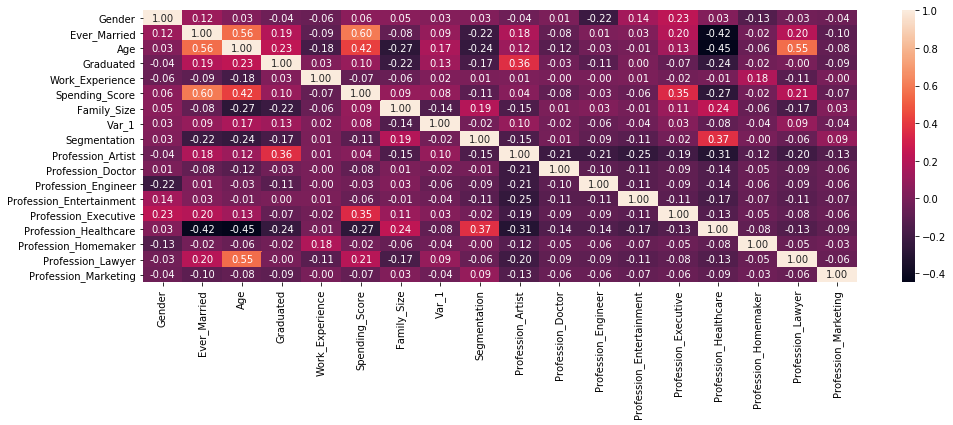

In [34]:
#plotting heatmap for co-relation
plt.figure(figsize = (16,5))
sns.heatmap(df_train.corr(), annot=True, fmt=",.2f")

In [35]:
#loading the test dataset
df_test = pd.read_csv('Test.csv')

In [36]:
df_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [37]:
df_test.shape

(2627, 11)

In [38]:
#cleaning the dataset and applying the same as done with train dataset

In [39]:
#null values in each column
df_test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [40]:
#replacing null values and dropping unneccessary columns

In [41]:
#dropping the column "ID" since it is not neccessary for our model
df_test.drop(["ID"], axis=1, inplace=True)

In [42]:
#replacing "No" for the null values in the below two columns
df_test["Ever_Married"].fillna("No", inplace=True)
df_test["Graduated"].fillna("No", inplace=True)

In [43]:
#dropping the null values in "Profession" since it can't be replaced
df_test.dropna(subset=["Profession"], inplace=True)

In [44]:
#replacing the null values with mean for "Family size" variable
df_test["Family_Size"].fillna(df_test["Family_Size"].mean(), inplace=True)

In [45]:
#dropping the null values in "Var_1" since it can't be replaced
df_test.dropna(subset=["Var_1"], inplace=True)

In [46]:
#replacing the null values with mean for "Work Experience" variable
df_test["Work_Experience"].fillna(df_test["Work_Experience"].mean(), inplace=True)

In [47]:
df_test["Gender"].value_counts()

Male      1383
Female    1174
Name: Gender, dtype: int64

In [48]:
df_test.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

Converting the categorical variables to numeric by 0's and 1's 

In [49]:
#Converting categorical variable "Gender" to numeric as 1 - Male and 0 - Female
df_test['Gender'] = df_test['Gender'].replace({'Male':1, 'Female':0})

In [50]:
#Converting categorical variable "Ever_Married" to numeric as 1 - Married and 0 - Not Married
df_test['Ever_Married'] = df_test['Ever_Married'].replace({'Yes':1, 'No':0})

In [51]:
#Converting categorical variable "Graduated" to numeric as 1 - Yes and 0 - No
df_test['Graduated'] = df_test['Graduated'].replace({'Yes':1, 'No':0})

In [52]:
#Converting categorical variable "Spending_Score" to numeric as 0 - Low, 1 - Average, and 2 - High
df_test['Spending_Score'] = df_test['Spending_Score'].replace({'Low': 0, 'Average':1, 'High' : 2})

In [53]:
#Converting categorical variable "Var_1" to numeric
df_test['Var_1'] = df_test['Var_1'].replace({'Cat_1': 1, 'Cat_2':2, 'Cat_3' : 3, 'Cat_4' : 4, 'Cat_5': 5, 'Cat_6':6, 'Cat_7':7})

In [54]:
df_test["Segmentation"].value_counts()

A    822
D    743
B    536
C    456
Name: Segmentation, dtype: int64

In [55]:
#Converting the target categorical variable "Segmentation" to numeric as 1 - A, 2 - B, 3- C, and 4 - D
df_test['Segmentation'] = df_test['Segmentation'].replace({'A': 1, 'B':2, 'C' : 3, 'D': 4})

In [56]:
#using one hot encoding for "Profession" to convert to numeric from categorical variable
df_test = pd.concat([df_test, pd.get_dummies(df_test["Profession"], prefix="Profession")], axis=1)

In [57]:
#dropping the "Profession" column since we coverted into numeric
df_test.drop(["Profession"], axis=1, inplace=True)

In [58]:
#correlations between each variables
df_test.corr()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
Gender,1.000000,0.112926,0.003162,-0.058872,-0.064890,0.051073,0.071711,0.033688,-0.004383,-0.045548,-0.012939,-0.204025,0.129549,0.223197,0.064687,-0.130297,-0.033468,-0.028992
Ever_Married,0.112926,1.000000,0.562672,0.199377,-0.106338,0.581316,-0.086716,0.091643,-0.063892,0.132746,-0.045674,0.016649,0.031696,0.192143,-0.410415,-0.016910,0.212428,-0.084409
Age,0.003162,0.562672,1.000000,0.226124,-0.174763,0.445521,-0.280290,0.179084,-0.076779,0.100110,-0.101017,-0.050561,-0.018919,0.118665,-0.441693,-0.061946,0.574659,-0.067063
Graduated,-0.058872,0.199377,0.226124,1.000000,0.045433,0.088428,-0.257974,0.149655,-0.053214,0.359995,0.005290,-0.088973,-0.006131,-0.057602,-0.245637,-0.034398,-0.030464,-0.104508
Work_Experience,-0.064890,-0.106338,-0.174763,0.045433,1.000000,-0.073764,-0.068135,0.012939,-0.019429,0.013829,-0.005970,0.009051,0.019353,-0.016778,-0.017467,0.162617,-0.105244,-0.008022
Spending_Score,0.051073,0.581316,0.445521,0.088428,-0.073764,1.000000,0.076166,0.092082,-0.043004,0.023648,-0.068339,-0.027367,-0.044421,0.329728,-0.268874,-0.027562,0.235894,-0.069213
Family_Size,0.071711,-0.086716,-0.280290,-0.257974,-0.068135,0.076166,1.000000,-0.182856,0.016326,-0.161146,0.018434,0.025712,-0.025432,0.114528,0.232844,-0.055943,-0.160142,0.049675
Var_1,0.033688,0.091643,0.179084,0.149655,0.012939,0.092082,-0.182856,1.000000,-0.000811,0.092379,-0.025659,-0.088663,-0.014502,0.054868,-0.081591,-0.040395,0.088280,-0.031716
Segmentation,-0.004383,-0.063892,-0.076779,-0.053214,-0.019429,-0.043004,0.016326,-0.000811,1.000000,-0.052661,-0.021149,-0.025604,-0.025863,0.001571,0.108483,0.006332,0.001748,0.021966
Profession_Artist,-0.045548,0.132746,0.100110,0.359995,0.013829,0.023648,-0.161146,0.092379,-0.052661,1.000000,-0.215395,-0.212910,-0.244459,-0.180286,-0.292462,-0.119497,-0.204318,-0.141897


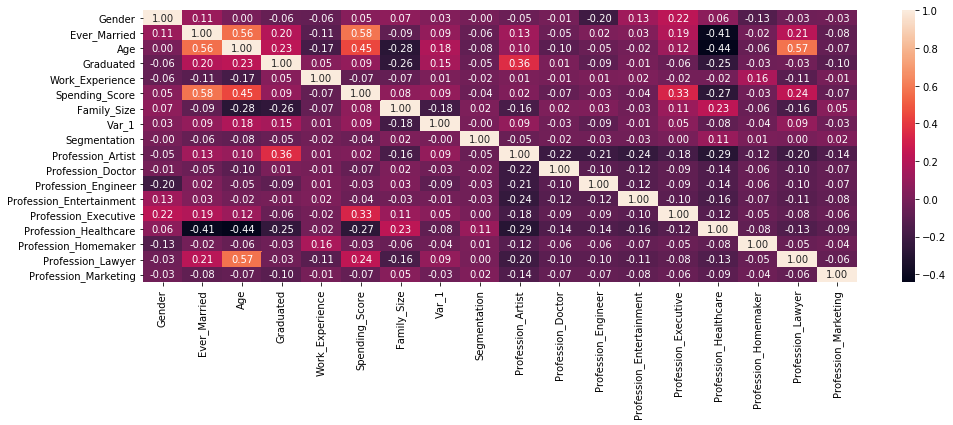

In [59]:
#plotting heatmap for co-relation
plt.figure(figsize = (16,5))
sns.heatmap(df_test.corr(), annot=True, fmt=",.2f")

In [60]:
#Importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [61]:
#Creating an instance for Random forest
clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

In [62]:
#Splitting the datasets accordingly

In [63]:
X_train = df_train.drop('Segmentation', axis=1)

In [64]:
X_test = df_test.drop('Segmentation', axis=1)

In [65]:
#y_train = df_train['Segmentation']
y_train = df_train.loc[ :, ['Segmentation']]

In [66]:
y_test = df_test.loc[ :, ['Segmentation']]

In [67]:
X_train.shape

(7871, 17)

In [68]:
y_train.shape

(7871, 1)

Random Forest Classifier

In [69]:
#Training the model using the training sets 
clf.fit(X_train, y_train)

C:\Users\Rathan Raju\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [70]:
#Importing scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
# Model Accuracy
pred_X=clf.predict(X_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, pred_X)))

pred_rf = clf.predict(X_test)
print('Testing accuracy is {}'.format(accuracy_score(y_test, pred_rf)))

Training accuracy is 0.9399059839918689
Testing accuracy is 0.31795072350410636


In [71]:
rf_pred = pd.DataFrame(pred_rf)

In [72]:
#Converting back the target numerical variable to  categorical variable "Segmentation" as 1 - A, 2 - B, 3- C, and 4 - D
rf_pred = rf_pred.replace({1: 'A', 2 : 'B', 3 : 'C',  4 : 'D'})

In [73]:
#exporting the predicted data to csv
rf_pred.to_csv('rf_pred.csv',index=False)

SVM Classifier

In [74]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

C:\Users\Rathan Raju\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)

In [76]:
accuracy

0.3269456394211967

In [77]:
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

In [78]:
cm

array([[266, 103, 228, 225],
       [178,  73, 171, 114],
       [127,  79, 185,  65],
       [199,  59, 173, 312]], dtype=int64)

In [79]:
svm_pred = pd.DataFrame(svm_predictions)

In [80]:
#Converting back the target numerical variable to  categorical variable "Segmentation" as 1 - A, 2 - B, 3- C, and 4 - D
svm_pred = svm_pred.replace({1: 'A', 2 : 'B', 3 : 'C',  4 : 'D'})

In [81]:
#exporting the predicted data to csv
svm_pred.to_csv('svm_pred.csv',index=False)